In [56]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
from os import listdir
from os.path import isfile, join
import sys
import cv2
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
#import matplotlib
from PIL import Image, ImageDraw
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from matplotlib import pyplot
from shapely.geometry.polygon import LinearRing, Polygon
from skimage.color import rgb2gray, gray2rgb
from skimage.filters import threshold_otsu
# from multiprocessing import Pool
import multiprocessing
import time
import random
import pickle
from scipy.spatial import ConvexHull
import bbox_visualizer as bbv
sys.path.insert(0, os.path.dirname(os.path.abspath('.'))) # to make imports relative to project root work

In [4]:
#load df and split by point annotation
df = pd.read_pickle("labels.pkl")
df_points = df[df['annotation_type'] == 'Point']

In [77]:
filename =  'IMG_20150918_161508'
df_file = df[df['filename'] == filename]
first_position = df_file['position'].iloc[-1]
first_position

[(1567, 805)]

In [68]:
def get_point_bbx(position, bb_pixel):
    point_list = np.array(position)
    x_min = int(point_list[:, 0] - 0.5 * bb_pixel)
    x_max = int(point_list[:, 0] + 0.5 * bb_pixel)
    y_min = int(point_list[:, 1] - 0.5 * bb_pixel)
    y_max = int(point_list[:, 1] + 0.5 * bb_pixel)
    return [x_min, y_min, x_max, y_max]

In [70]:
rect = get_point_bbx(first_position, 140)
rect

[1497, 735, 1637, 875]

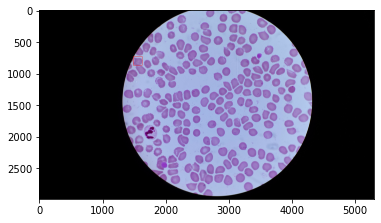

In [71]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
img_with_box = bbv.draw_rectangle(img, rect, bbox_color=(255, 0, 0))
plt.imshow(img_with_box)

In [72]:
df_file['bbx'] = df_file['position'].apply(lambda x: get_point_bbx(x,140))
df_file

,?,cell,comment,annotation_type,??,position,filename,txt_path,img_path,bbx
0,1-1,Parasitized,No_Comment,Point,1,"[(2470, 1302)]",IMG_20150918_161508,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,"[2400, 1232, 2540, 1372]"
1,1-2,Uninfected,No_Comment,Point,1,"[(1598, 944)]",IMG_20150918_161508,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,"[1528, 874, 1668, 1014]"
2,1-3,Uninfected,No_Comment,Point,1,"[(1756, 987)]",IMG_20150918_161508,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,"[1686, 917, 1826, 1057]"
3,1-4,Uninfected,No_Comment,Point,1,"[(2000, 895)]",IMG_20150918_161508,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,"[1930, 825, 2070, 965]"
4,1-5,Uninfected,No_Comment,Point,1,"[(1938, 1006)]",IMG_20150918_161508,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,"[1868, 936, 2008, 1076]"
...,...,...,...,...,...,...,...,...,...,...
198,1-199,Uninfected,No_Comment,Point,1,"[(1793, 648)]",IMG_20150918_161508,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,"[1723, 578, 1863, 718]"
199,1-200,Uninfected,No_Comment,Point,1,"[(1904, 697)]",IMG_20150918_161508,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,"[1834, 627, 1974, 767]"
200,1-201,Uninfected,No_Comment,Point,1,"[(1842, 799)]",IMG_20150918_161508,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,"[1772, 729, 1912, 869]"
201,1-202,Uninfected,No_Comment,Point,1,"[(1734, 854)]",IMG_20150918_161508,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,../NIH-NLM-ThinBloodSmearsPf/Point Set/250C102...,"[1664, 784, 1804, 924]"


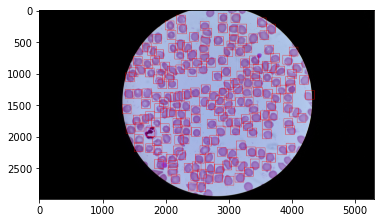

In [73]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
img_with_box = bbv.draw_multiple_rectangles(img, df_file['bbx'].tolist(), bbox_color = (255, 0, 0), thickness=3)
plt.imshow(img_with_box)